# DLMDSPWP01

In [2]:
import os

# Imports
import pandas as pd
import seaborn as sns

from entities.dataset import Dataset

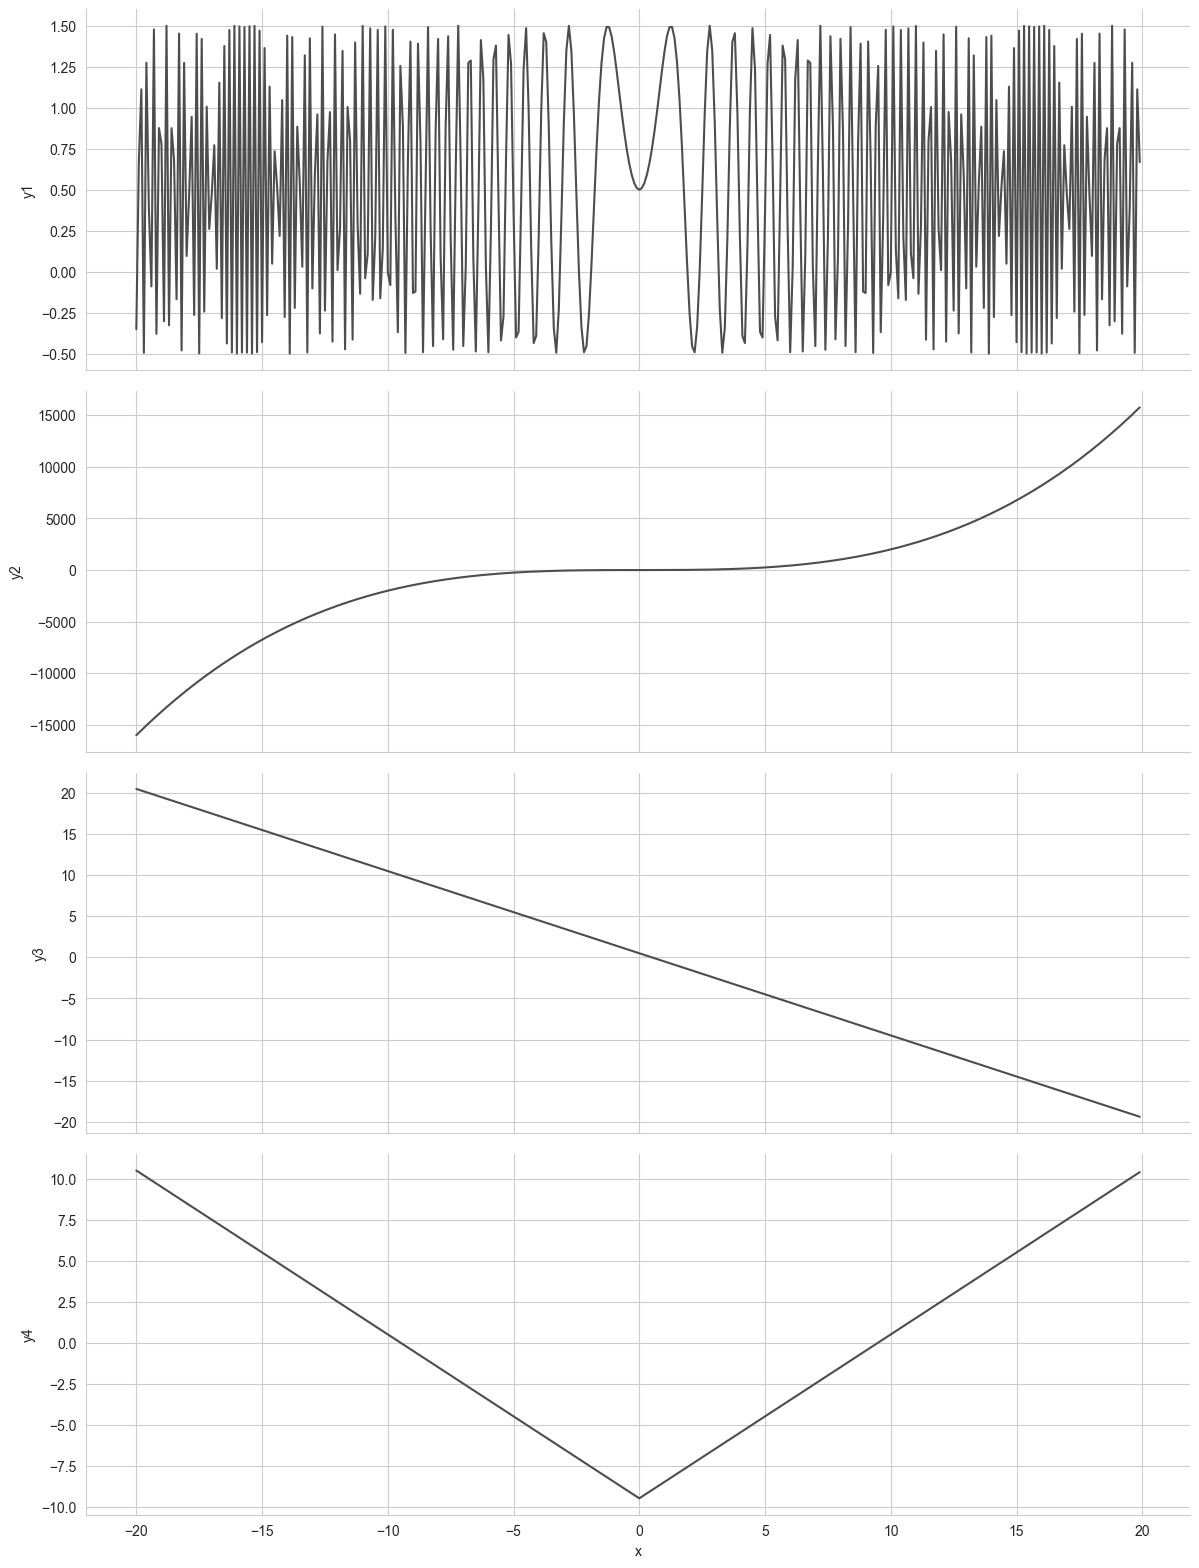

In [15]:
train_df = pd.read_csv(os.path.join(".", "data", "train", "train.csv"))

g = sns.PairGrid(train_df, x_vars=["x"], y_vars=sorted(set(train_df.columns) - { "x" }, key=lambda x: int("".join(x[1:]))), height=4, aspect=3)
g.map(sns.lineplot, color=".3")


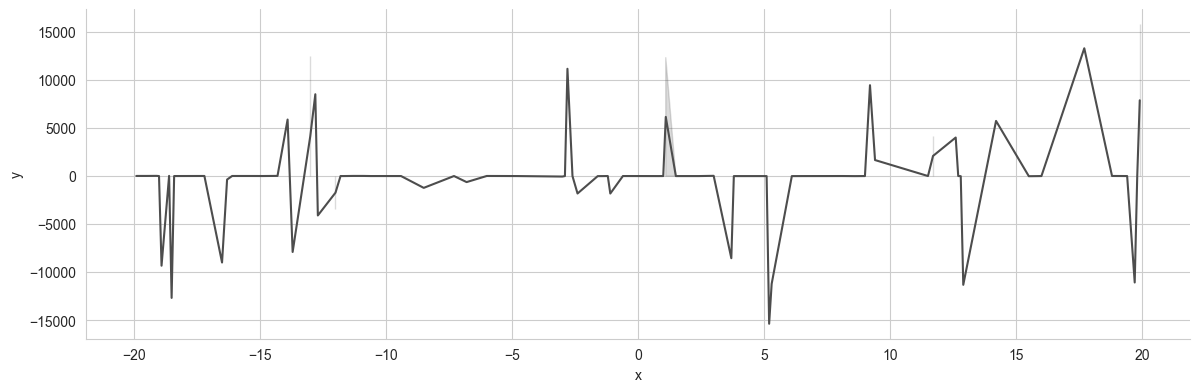

In [64]:
test_df = pd.read_csv(os.path.join(".", "data", "test", "test.csv"))

g = sns.PairGrid(test_df, x_vars=["x"], y_vars=sorted(set(test_df.columns) - { "x" }), height=4, aspect=3)
g.map(sns.lineplot, color=".3")

In [1]:
ideal_functions_df = pd.read_csv(os.path.join(".", "data", "functions", "ideal.csv"))

g = sns.PairGrid(ideal_functions_df, x_vars=["x"], y_vars=sorted(set(ideal_functions_df.columns) - { "x" }, key=lambda x: int("".join(x[1:]))), height=4, aspect=3)
g.map(sns.lineplot, color=".3")

NameError: name 'pd' is not defined

In [36]:
train_datasets = [Dataset(train_df["x"], train_df[f'y{str(i)}']) for i in range(1, len(train_df.columns))]
test_dataset = Dataset(test_df["x"], test_df['y'])
ideal_functions_datasets = [Dataset(ideal_functions_df["x"], ideal_functions_df[f'y{str(i)}']) for i in range(1, len(ideal_functions_df.columns))]

In [80]:
least_square_scores = {i + 1: sum([ideal_functions_dataset.least_square_to_other_dataset(train_dataset) / len(train_datasets) for train_dataset in train_datasets]) for i, ideal_functions_dataset in enumerate(ideal_functions_datasets)}
least_square_scores = sorted(least_square_scores.items(), key=lambda item: item[1])

<AxesSubplot: >

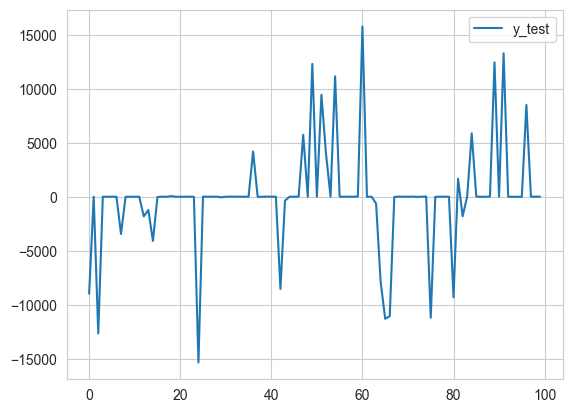

In [79]:
top_k = 4
top_indices = [f"y{index}" for index, least_square_score in least_square_scores][:top_k]
